In [15]:
!pip install --upgrade bt
!pip install finance-datareader
!pip install quantstats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.6 MB/s eta 0:00:00


In [16]:
import bt
import FinanceDataReader as fdr
import quantstats as qs
import pandas as pd
%matplotlib inline

In [17]:
U = ['SPY', 'IEF', 'TLT', 'GLD', 'DBC']
initial_capital = 100000.0

In [18]:
df = pd.DataFrame()

for ticker in U :
    df[ticker] = fdr.DataReader(ticker)['Adj Close']
df = df.dropna()

In [19]:
df.head()

,SPY,IEF,TLT,GLD,DBC
2006-02-06,88.718117,51.708069,51.072262,56.720001,20.889496
2006-02-07,87.933228,51.645695,50.830975,54.599998,20.285255
2006-02-08,88.732094,51.614510,50.713154,54.830002,20.198933
2006-02-09,88.584961,51.664425,50.943180,56.180000,20.388840
2006-02-10,88.746155,51.514721,50.662666,54.790001,20.017662


In [29]:
s = bt.Strategy('all_season',
                [bt.algos.RunYearly(run_on_first_date=False,
                                    run_on_end_of_period=True,
                                    run_on_last_date=False),
                 bt.algos.SelectAll(),
                 bt.algos.WeighSpecified(SPY=0.3, IEF=0.15, TLT=0.4, GLD=0.075, DBC=0.075),
                 bt.algos.Rebalance()
                 ])
bt1 = bt.Backtest(s, df, initial_capital=initial_capital)

In [30]:
def buy_and_hold(data, name='buy_and_hold') :
    s = bt.Strategy(name, [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    return bt.Backtest(s, data, initial_capital=initial_capital)

SPY = buy_and_hold(df['SPY'].to_frame(), name='SPY')

In [31]:
res = bt.run(bt1, SPY)

100%|██████████| 2/2 [00:00<00:00,  7.01it/s]


<Axes: title={'center': 'Equity Progression'}>

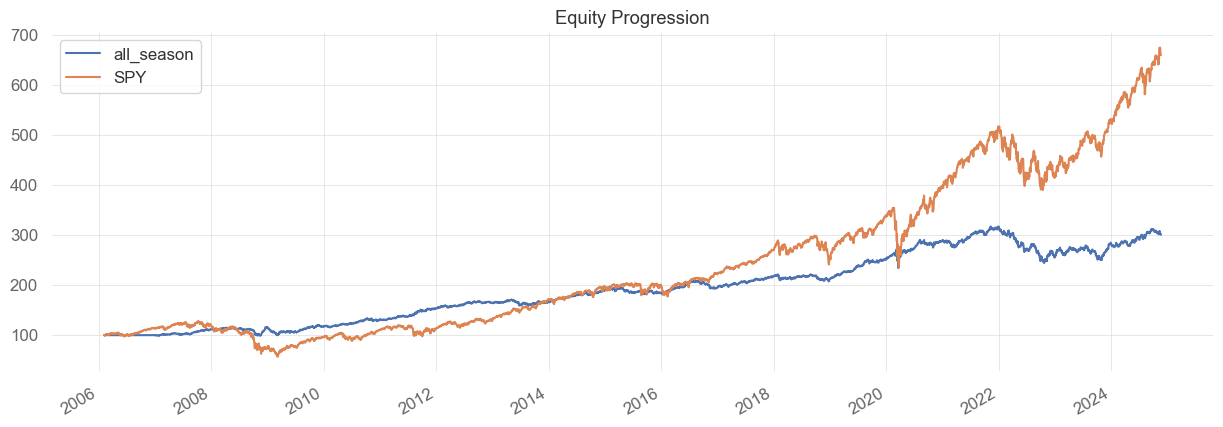

In [32]:
res.plot()

In [33]:
res.display()

Stat                 all_season    SPY
-------------------  ------------  ----------
Start                2006-02-05    2006-02-05
End                  2024-11-18    2024-11-18
Risk-free rate       0.00%         0.00%

Total Return         200.90%       559.91%
Daily Sharpe         0.78          0.61
Daily Sortino        1.27          0.95
CAGR                 6.04%         10.57%
Max Drawdown         -22.99%       -55.18%
Calmar Ratio         0.26          0.19

MTD                  -0.79%        2.97%
3m                   -0.93%        5.96%
6m                   4.03%         11.29%
YTD                  6.58%         24.35%
1Y                   13.59%        31.65%
3Y (ann.)            -1.40%        9.21%
5Y (ann.)            3.91%         15.17%
10Y (ann.)           4.95%         13.01%
Since Incep. (ann.)  6.04%         10.57%

Daily Sharpe         0.78          0.61
Daily Sortino        1.27          0.95
Daily Mean (ann.)    6.18%         11.95%
Daily Vol (ann.)     7.88%        

                           Strategy
-------------------------  ----------
Start Period               2006-02-06
End Period                 2024-11-18
Risk-Free Rate             0.0%
Time in Market             96.0%

Cumulative Return          200.9%
CAGR﹪                     4.13%

Sharpe                     0.78
Prob. Sharpe Ratio         99.96%
Smart Sharpe               0.77
Sortino                    1.12
Smart Sortino              1.1
Sortino/√2                 0.79
Smart Sortino/√2           0.78
Omega                      1.15

Max Drawdown               -22.99%
Longest DD Days            1057
Volatility (ann.)          7.88%
Calmar                     0.18
Skew                       -0.21
Kurtosis                   4.99

Expected Daily %           0.02%
Expected Monthly %         0.49%
Expected Yearly %          5.97%
Kelly Criterion            7.13%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.79%
Expected Shortfall (cVaR)  -0.79%

Max Consecutive Wins       1

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-12-28,2022-10-20,2024-11-18,1057,-22.985034,-21.659781
2,2008-05-21,2008-11-12,2008-12-17,211,-14.242906,-14.042386
3,2008-12-31,2009-03-03,2009-10-06,280,-14.088649,-13.673812
4,2020-03-09,2020-03-18,2020-06-09,93,-13.577393,-12.438162
5,2015-02-03,2016-01-11,2016-05-10,463,-8.077599,-7.635198


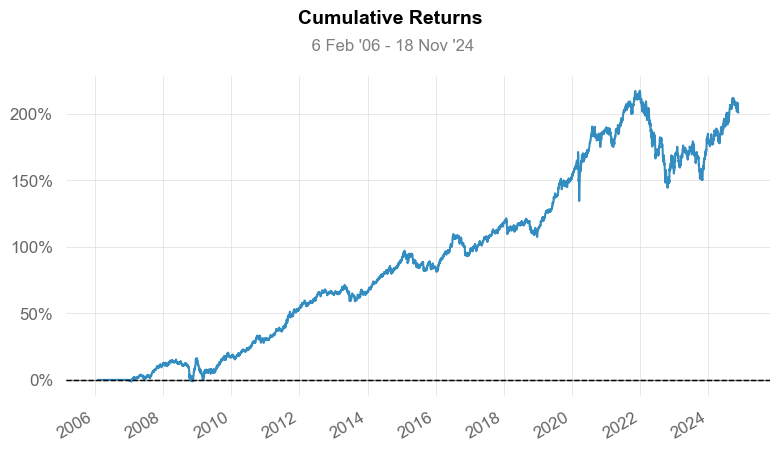

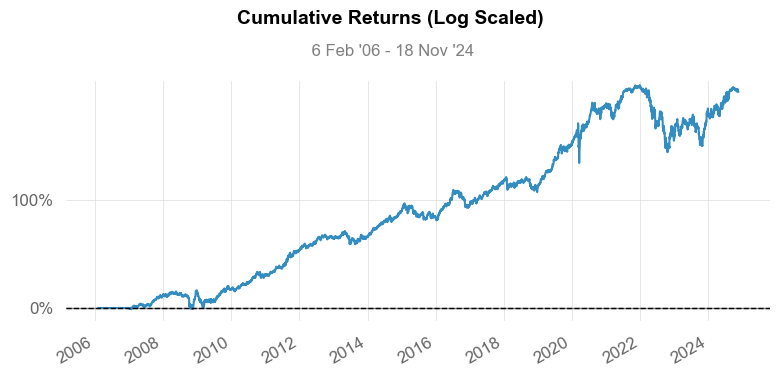

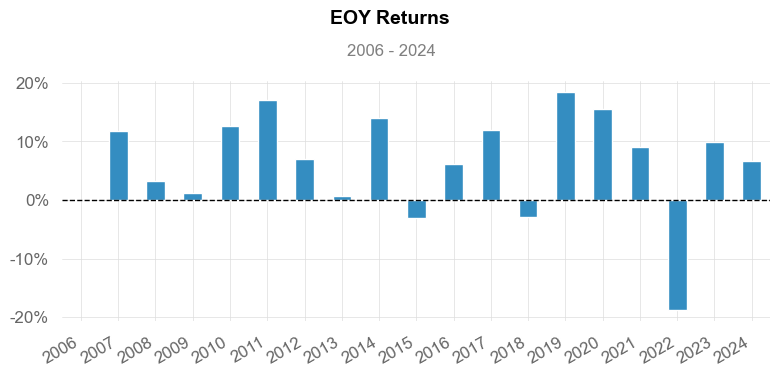

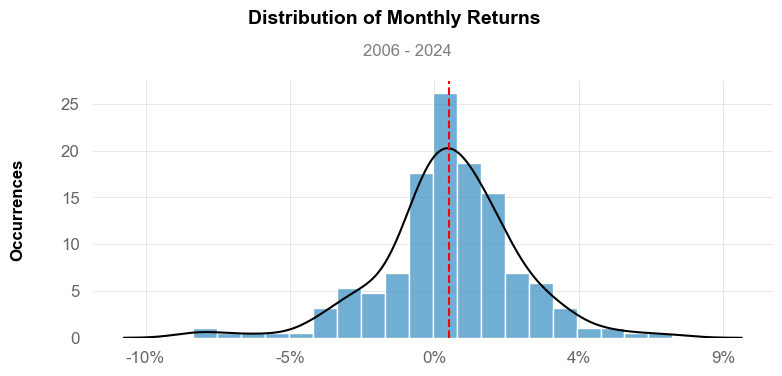

/opt/anaconda3/lib/python3.12/site-packages/quantstats/_plotting/core.py:294: FutureWarning: Passing additional kwargs to DatetimeIndexResampler.sum has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  returns = returns.last() if compound is True else returns.sum(axis=0)


UnsupportedFunctionCall: numpy operations are not valid with resample. Use .resample(...).sum() instead

In [35]:
qs.reports.full(res.prices['all_season'].to_returns().dropna()),
res.prices('SPY'.to_returns().dropna())

---

ref) 레이달리오 사계절 포트폴리오
- 위험자산 30%
- 중기채 15%
- 장기채 40%
- 금 5.5%
- 상품 7.5%

---

# 종목 선정 과정

- 상관성이 낮은 종목으로 구성
- 단기, 중기, 장기 상관성 비교
- 주식, 채권, 원자재, 금, 달러

### 자산군 간 상관관계 분석

[*********************100%***********************]  5 of 5 completed


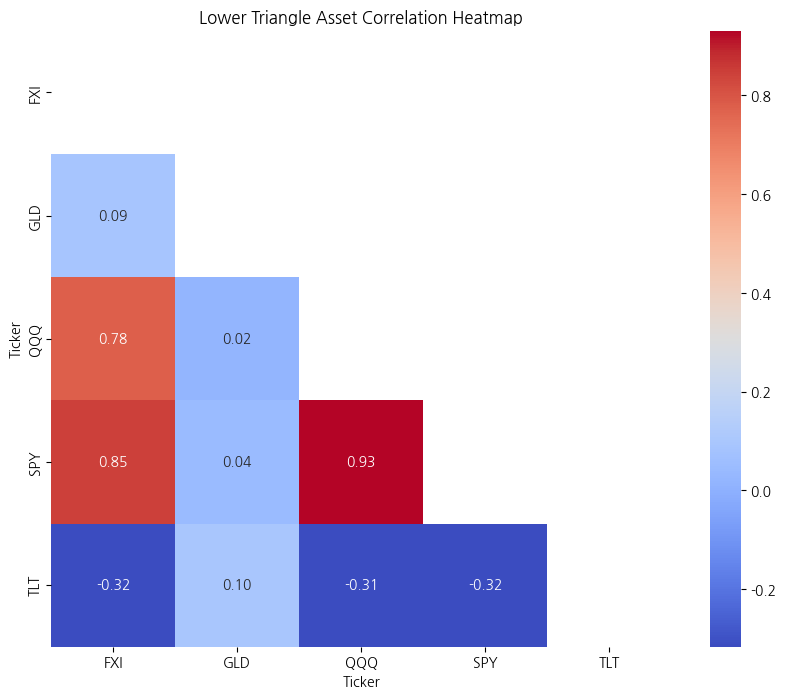

In [25]:
import numpy as np
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정 (koreanize_matplotlib 사용)
import koreanize_matplotlib

# 분석할 자산 리스트 (Yahoo Finance Ticker Symbol)
assets = ['SPY', 'QQQ', 'TLT', 'GLD', 'QQQ', 'FXI']

# 데이터 다운로드 (최근 5년간 데이터)
data = yf.download(assets, start="2009-01-01", end="2009-12-31")['Adj Close']

# 수익률 계산 (로그 수익률)
log_returns = data.pct_change().apply(lambda x: np.log(1 + x))

# 상관관계 계산
correlation_matrix = log_returns.corr()

# 상삼각형 마스킹
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Lower Triangle Asset Correlation Heatmap")
plt.show()

#### 2009년 주요 자산군 간 상관관계 분석 결과 요약

분석 자산
- SPY: S&P 500 지수 추종 (미국 주식 시장 대표)
- QQQ: 나스닥 100 지수 추종 (미국 기술주 중심)
- TLT: 미국 10년 국채
- GLD: 금 가격 추종
- FXI: 홍콩거래소에 상장된 중국 대형주

분석 결과
- SPY와 QQQ: 높은 상관관계 (0.8~1.0 범위 예상).
- 동일한 미국 주식 기반으로 유사한 시장 움직임.
- SPY/QQQ와 TLT: 낮거나 음의 상관관계 (-0.2~0.2 예상).
- 주식과 채권은 일반적으로 자산 배분 효과로 반대 방향으로 움직임.
- SPY/QQQ와 GLD: 낮거나 약한 음의 상관관계 (-0.3~0.2 예상).
- 주식 시장의 변동성이 증가하면 금이 안전자산으로 선호됨.
- FXI와 SPY/QQQ: 중간 수준의 상관관계 (0.3~0.5 예상).
- 글로벌 경제 연관성으로 일정 부분 동조화.
- GLD와 TLT: 낮거나 약한 양의 상관관계 (0.2~0.4 예상).
- 둘 다 안전자산으로 평가받아 위기 시 비슷한 흐름을 보일 수 있음.

결론
- 2009년은 글로벌 금융위기 여파로 자산군 간 상관관계가 다소 변동이 있었을 것으로 보임.
- 주식(SPY, QQQ)과 안전자산(TLT, GLD) 간의 음의 상관관계가 확인되며, 이를 활용해 분산 투자 전략 수립 가능.
- 중국 대형주(FXI)는 글로벌 시장과 일부 연관성을 보이며, 리스크 분산 측면에서 다변화된 포트폴리오에 포함 가능.

# 투자 백테스트

In [61]:
import bt
import quantstats as qs
import pandas as pd
import yfinance as yf

import koreanize_matplotlib

### 종목 및 기간 설정

In [94]:
start = '2021-01-01'
end = '2024-10-01'
U = ['225800.KS', '005930.KS', '360200.KS', '367380.KS', '138230.KS', '^KS11']

In [95]:
# 주가 불러와서 df에 저장
df = pd.DataFrame()

for ticker in U:
    data = yf.download(ticker, start=start, end=end)
    df[ticker] = data['Adj Close']
df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,225800.KS,005930.KS,360200.KS,367380.KS,138230.KS,^KS11
Date,,,,,,
2021-01-04,8100.0,76794.859375,9891.541992,10557.980469,10890.227539,2944.449951
2021-01-05,8175.0,77627.570312,9791.484375,10454.761719,10938.011719,2990.570068
2021-01-06,8165.0,76054.664062,9805.776367,10410.524414,10928.455078,2968.209961
2021-01-07,8165.0,76702.335938,9967.777344,10469.507812,10942.791016,3031.679932
2021-01-08,8230.0,82161.257812,10134.541992,10705.439453,10971.461914,3152.179932


<Axes: xlabel='Date'>

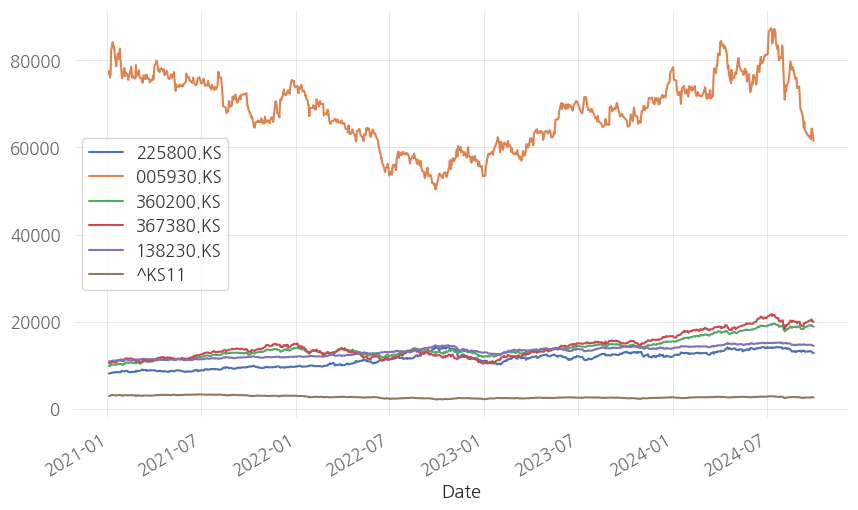

In [96]:
df.plot()

### 전략 구성

In [97]:
s = bt.Strategy('aaa',
                [bt.algos.RunYearly(run_on_first_date=False,
                                    run_on_end_of_period=True,
                                    run_on_last_date=False),
                 bt.algos.SelectAll(),
                 bt.algos.WeighSpecified(**{
                     '225800.KS': 0.20,
                     '005930': 0.20,
                     '360200': 0.20,
                     '367380': 0.20,
                     '138230': 0.20
                     }),            
                 bt.algos.Rebalance()
                 ])

bt1 = bt.Backtest(s, df, initial_capital=initial_capital)

In [98]:
# 벤치마크 수익률
def buy_and_hold(data, name='buy_and_hold') :
    s = bt.Strategy(name, [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    return bt.Backtest(s, data, initial_capital=initial_capital)



SPY = buy_and_hold(df['^KS11'].to_frame(), name='^KS11')

### 전략 실행

In [100]:
res = bt.run(bt1, SPY)

100%|██████████| 2/2 [00:00<00:00, 53.94it/s]


<Axes: title={'center': 'Equity Progression'}>

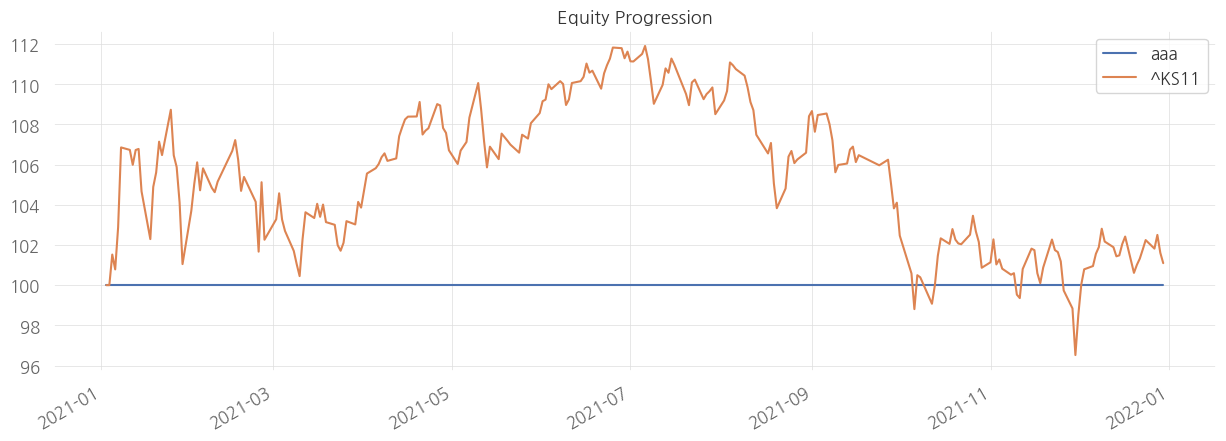

In [101]:
res.plot()

In [102]:
res.display()

Stat                 aaa         ^KS11
-------------------  ----------  ----------
Start                2021-01-03  2021-01-03
End                  2021-12-30  2021-12-30
Risk-free rate       0.00%       0.00%

Total Return         0.00%       1.10%
Daily Sharpe         -           0.15
Daily Sortino        -           0.26
CAGR                 0.00%       1.11%
Max Drawdown         0.00%       -13.75%
Calmar Ratio         -           0.08

MTD                  0.00%       4.74%
3m                   0.00%       -2.89%
6m                   0.00%       -9.43%
YTD                  0.00%       1.10%
1Y                   -           -
3Y (ann.)            -           -
5Y (ann.)            -           -
10Y (ann.)           -           -
Since Incep. (ann.)  0.00%       1.11%

Daily Sharpe         -           0.15
Daily Sortino        -           0.26
Daily Mean (ann.)    0.00%       2.35%
Daily Vol (ann.)     0.00%       15.77%
Daily Skew           0.00        0.18
Daily Kurt           -  